# Explore here

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


De 9 columnas, nos quedamos con 3

In [5]:
df_dep = df[['MedInc','Latitude','Longitude']]
df_dep.head()


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_dep, test_size=0.2, random_state=42)

In [8]:
from sklearn.cluster import KMeans

model_k = KMeans(n_clusters=6, n_init='auto', random_state=42)
model_k.fit(X_train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
model_k.labels_


array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

Estamos creando una variable Y de lo que estamos buscando

In [ ]:


y_train = list(model_k.labels_)
X_train['clusters'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,clusters
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


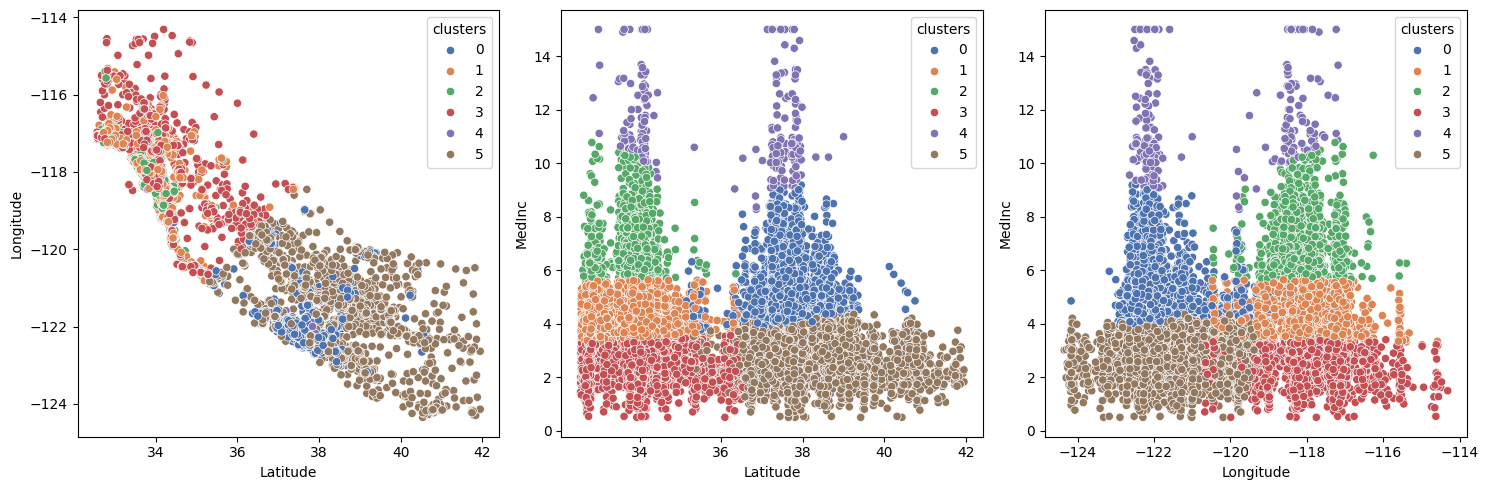

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=X_train, x = 'Latitude', y = 'Longitude', hue='clusters', palette='deep')
sns.scatterplot(ax = axis[1], data=X_train, x = 'Latitude', y = 'MedInc', hue='clusters', palette='deep')
sns.scatterplot(ax = axis[2], data=X_train, x = 'Longitude', y = 'MedInc', hue='clusters', palette='deep')

plt.tight_layout()
plt.show()


In [13]:
y_test = list(model_k.predict(X_test))
X_test['clusters'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,clusters
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


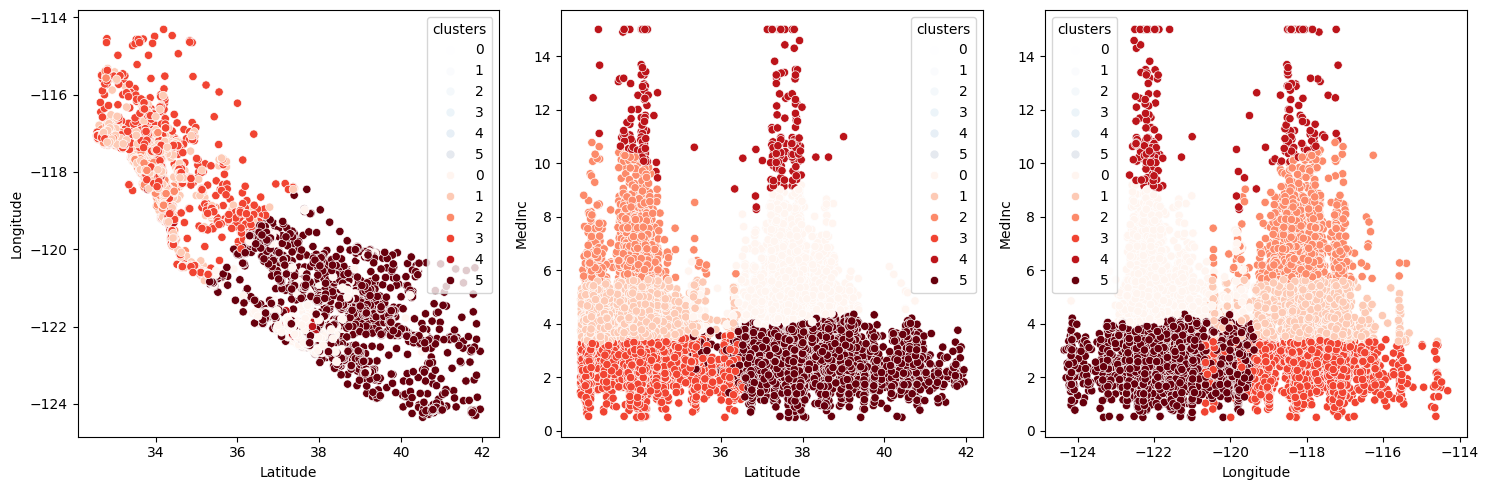

In [16]:

fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=X_train, x = 'Latitude', y = 'Longitude', hue='clusters', palette='Blues',alpha=0.1)
sns.scatterplot(ax = axis[1], data=X_train, x = 'Latitude', y = 'MedInc', hue='clusters', palette='Blues',alpha=0.1)
sns.scatterplot(ax = axis[2], data=X_train, x = 'Longitude', y = 'MedInc', hue='clusters', palette='Blues',alpha=0.1)

sns.scatterplot(ax = axis[0], data=X_train, x = 'Latitude', y = 'Longitude', hue='clusters', palette='Reds',markers='+')
sns.scatterplot(ax = axis[1], data=X_train, x = 'Latitude', y = 'MedInc', hue='clusters', palette='Reds',markers='+')
sns.scatterplot(ax = axis[2], data=X_train, x = 'Longitude', y = 'MedInc', hue='clusters', palette='Reds',markers='+')

plt.tight_layout()
plt.show()

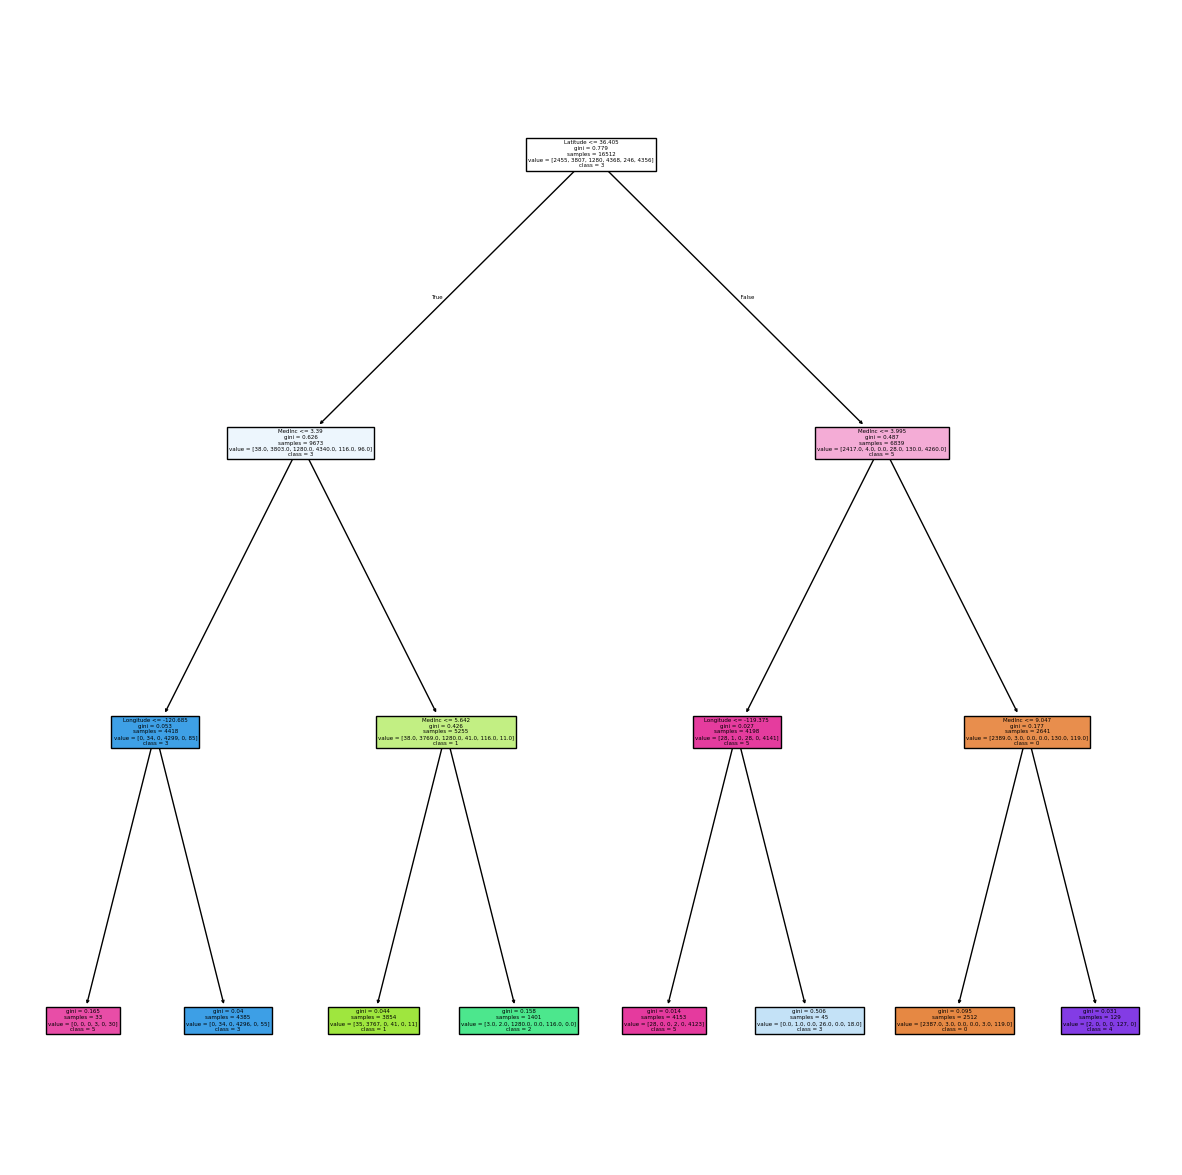

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train[['Latitude', 'Longitude', 'MedInc']], y_train)
from sklearn import tree
plt.figure(figsize=(15, 15))
tree.plot_tree(tree_model, filled=True, feature_names=['Latitude', 'Longitude', 'MedInc'], class_names=[str(i) for i in range(6)])
plt.show()

In [22]:
y_pred = tree_model.predict(X_test[['Latitude', 'Longitude', 'MedInc']])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')


Accuracy of the Decision Tree model: 0.97


In [23]:
from pickle import dump

dump(model_k, open('../models/kmeans_model.pkl', 'wb'))
dump(tree_model, open('../models/decision_tree_model.pkl', 'wb'))